In [10]:
import numpy as np
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score,log_loss,mean_absolute_error,root_mean_squared_error
from scipy.special import expit  # sigmoid
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from datetime import datetime

In [2]:
df =pd.read_excel("D:\\Réseaux de neurones\\PrédictionEfficacitéÉnergétiqueBâtiments\\energy+efficiency\\ENB2012_data.xlsx")
#df.head()

In [4]:
X=df.iloc[:,0:8]
Y=df.iloc[:,8:10]


Y.head()

,Y1,Y2
0,15.55,21.33
1,15.55,21.33
2,15.55,21.33
3,15.55,21.33
4,20.84,28.28


In [29]:
#normalisation
scaler = StandardScaler()
X = scaler.fit_transform(X)
X.shape

(768, 8)

In [20]:
# Division train/test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [13]:
def activation(x, func='sigmoid'):
    if func == 'sigmoid':
        return 1 / (1 + np.exp(-x))
    elif func == 'tanh':
        return np.tanh(x)
    elif func == 'relu':
        return np.maximum(0, x)
    elif func == 'identity':
        return x
    else:
        raise ValueError("Fonction d'activation non reconnue.")

In [14]:

class ELMRegressor:
    def __init__(self, n_hidden, activation_function='sigmoid'):
        self.n_hidden = n_hidden
        self.activation_function = activation_function

    def fit(self, X, T):
        N, n = X.shape
        L = self.n_hidden
        m = T.shape[1] if T.ndim > 1 else 1
        T=T.values
        T = T.reshape(N, m)

        # Initialisation aléatoire des poids W (L, n) et biais B (L, 1)
        self.W = np.random.randn(L, n)
        self.B = np.random.randn(L, 1)

        # Calcul de la matrice cachée H (N, L)
        H = activation(np.dot(X, self.W.T) + self.B.T, self.activation_function)

        # Calcul de β = H⁺T (pseudo-inverse de H)
        H_pinv = np.linalg.pinv(H)
        self.Beta = np.dot(H_pinv, T)

    def predict(self, X):
        H = activation(np.dot(X, self.W.T) + self.B.T, self.activation_function)
        return np.dot(H, self.Beta)


In [28]:
def ELM_model(X_train, y_train,X_test,y_test,string,n_hidden=30, activation_function='tanh'):
    ELM = ELMRegressor(n_hidden, activation_function= activation_function)
    date_deb= datetime.now()
    ELM .fit(X_train, Y_train)
    date_fin= datetime.now()
    date_seconde=(date_fin-date_deb).total_seconds()
    y_pred = ELM .predict(X_test)
    
    
    visualisationYpEtYT(y_test,y_pred,string,date_seconde)
    
    #return y_pred

In [16]:
def visualMetrics(y1_test,y2_test,y1_pred,y2_pred):
    # y1_pred=y_pred[:,0]
    # y2_pred=y_pred[:,1]
    # y1_test=y_test.iloc[:, 0]
    # y2_test=y_test.iloc[:, 1]
    # Calcul des métriques
    mse1 = mean_squared_error(y1_test, y1_pred)
    rmse1 = np.sqrt(mse1)
    r21 = r2_score(y1_test, y1_pred)
    mae1 = mean_absolute_error(y1_test, y1_pred)
    
    mse2 = mean_squared_error(y2_test, y2_pred)
    rmse2 = np.sqrt(mse2)
    r22 = r2_score(y2_test, y2_pred)
    mae2 = mean_absolute_error(y2_test, y2_pred)
    
    # Noms des métriques
    labels = ['MSE', 'RMSE', 'MAE', 'R²']
    y1_scores = [mse1, rmse1, mae1, r21]
    y2_scores = [mse2, rmse2, mae2, r22]
    
    x = np.arange(len(labels))  # position des groupes
    width = 0.35  # largeur des barres
    
    # Création du graphe
    fig, ax = plt.subplots(figsize=(10, 6))
    bars1 = ax.bar(x - width/2, y1_scores, width, label='Y1', color='skyblue')
    bars2 = ax.bar(x + width/2, y2_scores, width, label='Y2', color='salmon')
    
    # Labels et mise en forme
    ax.set_ylabel('Valeur')
    ax.set_title('Comparaison des métriques Y1 vs Y2')
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.legend()
    
    # Affichage des valeurs sur les barres
    for bar in bars1 + bars2:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # Décalage vertical
                    textcoords="offset points",
                    ha='center', va='bottom')
    
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()

In [26]:
def visualisationYpEtYT(y_test,y_pred,string,date_seconde):
    y1_pred=y_pred[:,0]
    y2_pred=y_pred[:,1]
    y1_test=y_test.iloc[:, 0]
    y2_test=y_test.iloc[:, 1]
    
    valeurs = np.linspace(0, 20, 154)
    #plt.figure(figsize=(30, 6))
    plt.figure(figsize=(15, 10))
    plt.suptitle(f"Prédictions vs Réalité — {string} | Temps d'exécution : {date_seconde:.4f} sec", fontsize=14)
    #plt.subplot(141)
    plt.subplot2grid((2, 2), (0, 0))
    #plt.scatter(y1_test, y1_pred)
    plt.xlabel("X")
    plt.ylabel("Target")
    plt.title("Prédictions vs Réalité ( Heating Load  )")
    plt.plot(valeurs, y1_test, color='blue',label="Valeurs Réelles (Y1")
    plt.plot(valeurs, y1_pred ,color='red',label="Prédictions (Y1)",linestyle='--')
    plt.legend()
    
    #plt.subplot(142)
    plt.subplot2grid((2, 2), (0, 1))
    #plt.scatter(y2_test, y2_pred)
    plt.xlabel("X")
    
    plt.ylabel("Target")
    plt.title("Prédictions vs Réalité ( Cooling Load )")
    plt.plot(valeurs, y2_test, color='blue',label="Valeurs Réelles (Y2)")
    plt.plot(valeurs, y2_pred, color='red',label="Prédictions (Y2)",linestyle='--')
    plt.legend()

    #metrics Moyenne 
    plt.subplot2grid((2, 2), (1, 0) ,colspan=2)
    
    mse = mean_squared_error(y_test,y_pred)
    rmse = np.sqrt(mse)
    r2= r2_score(y_test,y_pred)
    mae = mean_absolute_error(y_test,y_pred)
    
        
    metrics = {
        'MSE': mse,
        'RMSE': rmse,
        'MAE': mae,
        'R2':  r2,
    }
    # Création du graphique en barres
    #plt.figure(figsize=(10, 6))
    bars = plt.bar(metrics.keys(), metrics.values(), color='skyblue')
    
    # Ajout des titres et labels
    plt.title('Visualisation des Métriques Moyennes', fontsize=16)
    plt.ylabel('Valeur', fontsize=14)
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    # Affichage des valeurs sur les barres
    for bar in bars:
        height = bar.get_height()
        plt.text(
            bar.get_x() + bar.get_width() / 2,  # Position x
            height,                             # Position y
            f'{height:.2f}',                    # Format de la valeur
            ha='center', va='bottom', fontsize=12, fontweight='bold'
        )
    
    
    visualMetrics(y1_test,y2_test,y1_pred,y2_pred)
    plt.show()
    

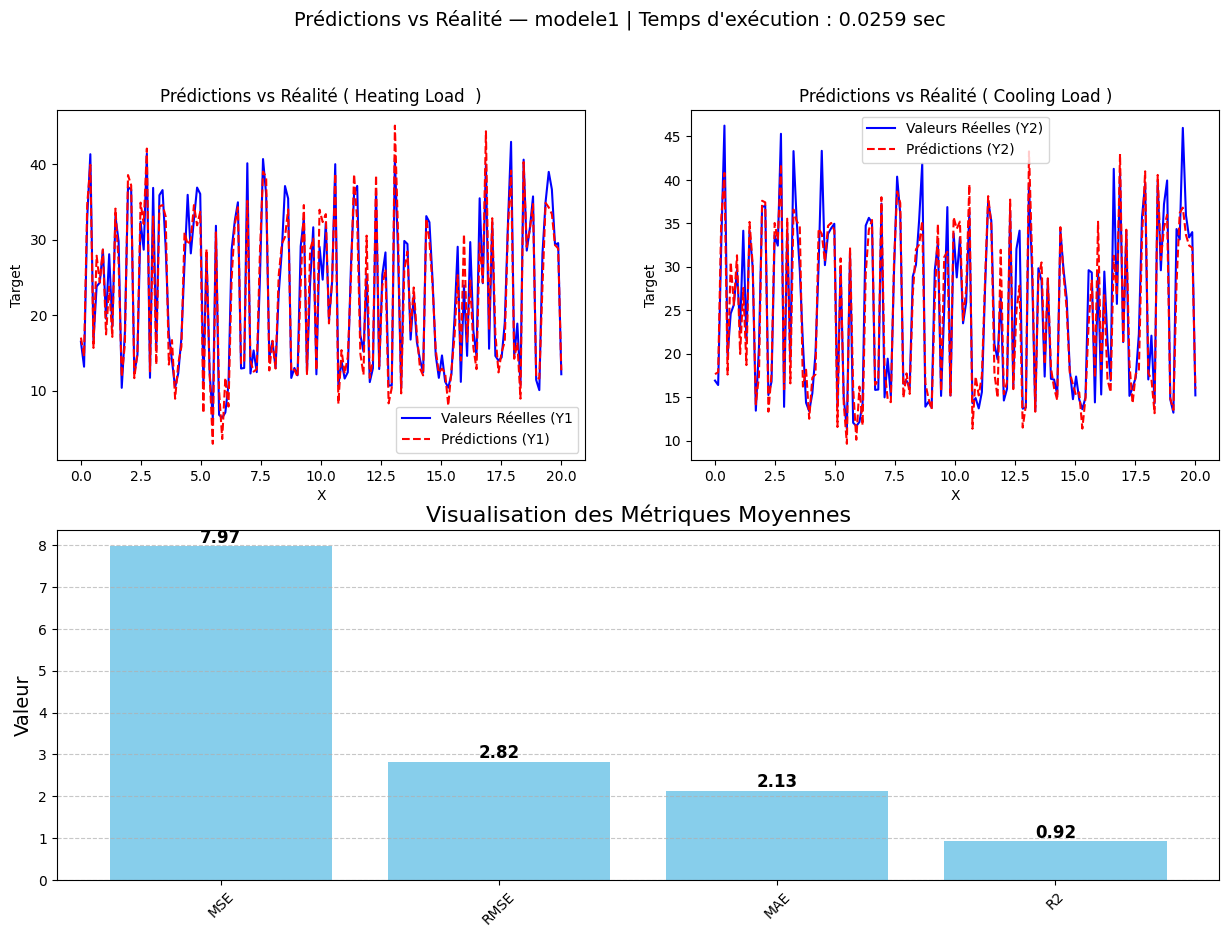

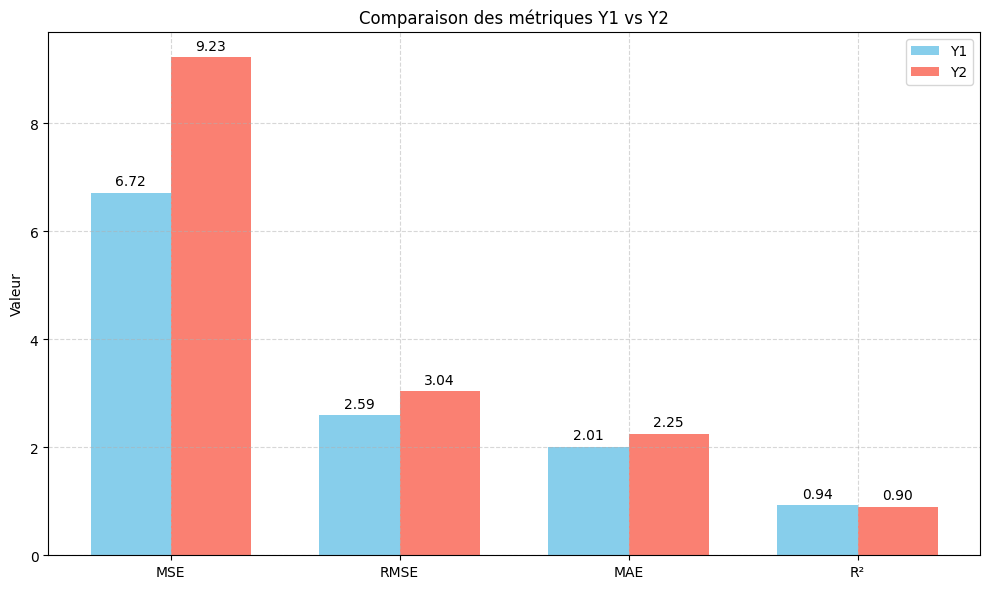

In [27]:
ELM_model(X_train, Y_train,X_test,Y_test,"modele1",n_hidden=40, activation_function='relu')

In [18]:
#ELM_model(X_train, Y_train,X_test,Y_test,"modele2",n_hidden=40, activation_function='identity')

In [40]:
#ELM_model(X_train, Y_train,X_test,Y_test,"modele3",n_hidden=50, activation_function='relu')

In [41]:
#ELM_model(X_train, Y_train,X_test,Y_test,"modele1",n_hidden=50, activation_function='relu')

In [42]:
#ELM_model(X_train, Y_train,X_test,Y_test,"modele1",n_hidden=40, activation_function='relu')